In [114]:
import numpy as np
import scipy.stats as st
import pandas as pd

# Dataset
dataBASELINE = pd.read_csv("TotalNormal.csv", usecols=["correct_numbers"]).dropna().squeeze()
dataMEMORY = pd.read_csv("TotalMemoryPattern.csv", usecols=["correct_numbers"]).dropna().squeeze()
dataSPEED = pd.read_csv("TotalSpeed.csv", usecols=["correct_numbers"]).dropna().squeeze()

# Calculate descriptive statistics for each condition
def calculate_stats(data, condition_name):
    n = len(data)
    mean_val = np.mean(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    
    # 95% Confidence Interval using t-distribution
    stderr = st.sem(data)
    ci_low, ci_high = st.t.interval(0.95, n-1, loc=mean_val, scale=stderr)
    
    return {
        'experiment_type': condition_name,
        'n': n,
        'mean_n_correct': round(mean_val, 2),
        'q1': q1,
        'median': median,
        'ci95_low': round(ci_low, 6),
        'ci95_high': round(ci_high, 6)
    }

# Calculate statistics for each condition
baseline_stats = calculate_stats(dataBASELINE, 'Baseline')
memory_stats = calculate_stats(dataMEMORY, 'Memory')
speed_stats = calculate_stats(dataSPEED, 'Speed-up')

# Create summary DataFrame
summary_data = [baseline_stats, memory_stats, speed_stats]
summary_df = pd.DataFrame(summary_data)

print("Summary (per condition):")
print(summary_df.to_string(index=False))

# Combined data analysis
combined_data = pd.concat([dataBASELINE, dataMEMORY, dataSPEED], ignore_index=True)
combined_stats = calculate_stats(combined_data, 'Combined')

print(f"\nCombined Analysis:")
print(f"Overall mean: {combined_stats['mean_n_correct']}")
print(f"95% CI: [{combined_stats['ci95_low']:.6f}, {combined_stats['ci95_high']:.6f}]")

Summary (per condition):
experiment_type  n  mean_n_correct  q1  median  ci95_low  ci95_high
       Baseline 35            4.14 3.0     4.0  3.558810   4.726904
         Memory 30            3.73 3.0     4.0  3.090801   4.375865
       Speed-up 60            4.60 4.0     4.0  4.213020   4.986980

Combined Analysis:
Overall mean: 4.26
95% CI: [3.974200, 4.553800]


In [107]:
# Load the corrected binary indicators from fixed CSV files
import pandas as pd
import numpy as np

# Load binary indicators: 1 = user included first/last number, 0 = did not include
first_baseline = pd.read_csv("TotalNormal.csv", usecols=["first_correct"]).squeeze("columns").astype(int)
last_baseline = pd.read_csv("TotalNormal.csv", usecols=["last_correct"]).squeeze("columns").astype(int)
first_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["first_correct"]).squeeze("columns").astype(int)
last_memory = pd.read_csv("TotalMemoryPattern.csv", usecols=["last_correct"]).squeeze("columns").astype(int)
first_speed = pd.read_csv("TotalSpeed.csv", usecols=["first_correct"]).squeeze("columns").astype(int)
last_speed = pd.read_csv("TotalSpeed.csv", usecols=["last_correct"]).squeeze("columns").astype(int)

print("Loaded corrected binary indicators:")
print(f"Baseline: {len(first_baseline)} attempts")
print(f"Memory: {len(first_memory)} attempts") 
print(f"Speed: {len(first_speed)} attempts")
print()
print("These now represent:")
print("1 = User correctly included the first/last number from the sequence")
print("0 = User did NOT include the first/last number")

Loaded corrected binary indicators:
Baseline: 35 attempts
Memory: 30 attempts
Speed: 60 attempts

These now represent:
1 = User correctly included the first/last number from the sequence
0 = User did NOT include the first/last number


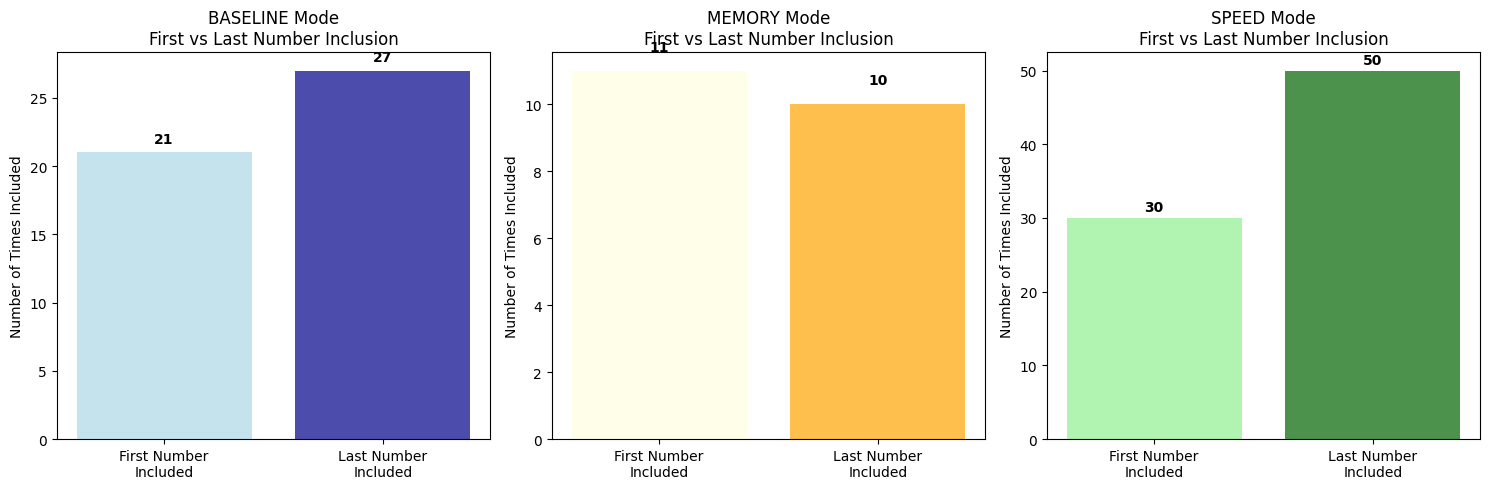

FIRST vs LAST NUMBER INCLUSION COUNTS:
----------------------------------------
BASELINE:  First included: 21/35, Last included: 27/35
MEMORY:  First included: 11/30, Last included: 10/30
SPEED:   First included: 30/60, Last included: 50/60

SUCCESS RATES:
BASELINE:  First: 60.0%, Last: 77.1%
MEMORY:  First: 36.7%, Last: 33.3%
SPEED:   First: 50.0%, Last: 83.3%


In [108]:
# ANALYSIS: First vs Last Number Inclusion by Game Mode
import matplotlib.pyplot as plt
import numpy as np

# Count how many times users correctly included first/last numbers
first_baseline_count = first_baseline.sum()  # Times first number was correctly included
last_baseline_count = last_baseline.sum()    # Times last number was correctly included

first_memory_count = first_memory.sum()  # Times first number was correctly included
last_memory_count = last_memory.sum()    # Times last number was correctly included

first_speed_count = first_speed.sum()    # Times first number was correctly included
last_speed_count = last_speed.sum()      # Times last number was correctly included

# Create comparison bar chart
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# BASELINE comparison
categories = ['First Number\nIncluded', 'Last Number\nIncluded']
baseline_counts = [first_baseline_count, last_baseline_count]
ax1.bar(categories, baseline_counts, color=['lightblue', 'darkblue'], alpha=0.7)
ax1.set_title('BASELINE Mode\nFirst vs Last Number Inclusion')
ax1.set_ylabel('Number of Times Included')
for i, v in enumerate(baseline_counts):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# MEMORY comparison  
memory_counts = [first_memory_count, last_memory_count]
ax2.bar(categories, memory_counts, color=['lightyellow', 'orange'], alpha=0.7)
ax2.set_title('MEMORY Mode\nFirst vs Last Number Inclusion')
ax2.set_ylabel('Number of Times Included')
for i, v in enumerate(memory_counts):
    ax2.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# SPEED comparison
speed_counts = [first_speed_count, last_speed_count]
ax3.bar(categories, speed_counts, color=['lightgreen', 'darkgreen'], alpha=0.7)
ax3.set_title('SPEED Mode\nFirst vs Last Number Inclusion')
ax3.set_ylabel('Number of Times Included')
for i, v in enumerate(speed_counts):
    ax3.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("FIRST vs LAST NUMBER INCLUSION COUNTS:")
print("-" * 40)
print(f"BASELINE:  First included: {first_baseline_count}/{len(first_baseline)}, Last included: {last_baseline_count}/{len(last_baseline)}")
print(f"MEMORY:  First included: {first_memory_count}/{len(first_memory)}, Last included: {last_memory_count}/{len(last_memory)}")  
print(f"SPEED:   First included: {first_speed_count}/{len(first_speed)}, Last included: {last_speed_count}/{len(last_speed)}")

# Calculate success rates
print(f"\nSUCCESS RATES:")
print(f"BASELINE:  First: {(first_baseline_count/len(first_baseline)*100):.1f}%, Last: {(last_baseline_count/len(last_baseline)*100):.1f}%")
print(f"MEMORY:  First: {(first_memory_count/len(first_memory)*100):.1f}%, Last: {(last_memory_count/len(last_memory)*100):.1f}%")
print(f"SPEED:   First: {(first_speed_count/len(first_speed)*100):.1f}%, Last: {(last_speed_count/len(last_speed)*100):.1f}%")

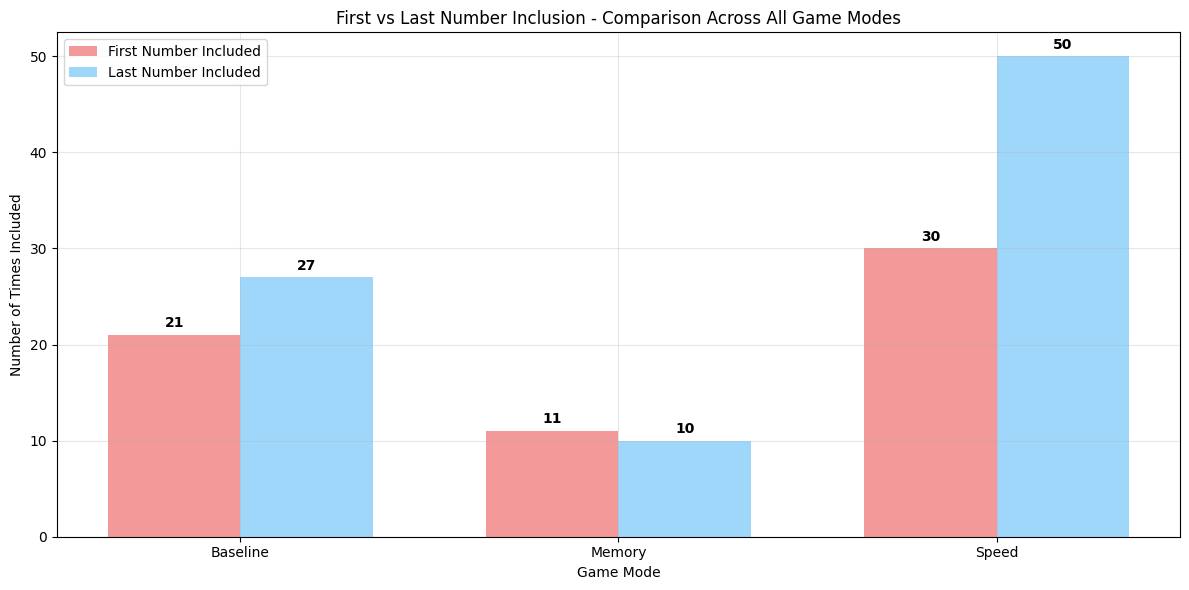


INCLUSION ANALYSIS:
----------------------------------------
Baseline:
  First number included: 21/35 (60.0%)
  Last number included:  27/35 (77.1%)

Memory:
  First number included: 11/30 (36.7%)
  Last number included:  10/30 (33.3%)

Speed:
  First number included: 30/60 (50.0%)
  Last number included:  50/60 (83.3%)



In [109]:
# OVERALL COMPARISON: All game modes side by side
fig, ax = plt.subplots(figsize=(12, 6))

# Data for grouped bar chart
game_modes = ['Baseline', 'Memory', 'Speed']
first_included = [first_baseline_count, first_memory_count, first_speed_count]
last_included = [last_baseline_count, last_memory_count, last_speed_count]

x = np.arange(len(game_modes))
width = 0.35

# Create grouped bars
bars1 = ax.bar(x - width/2, first_included, width, label='First Number Included', 
               color='lightcoral', alpha=0.8)
bars2 = ax.bar(x + width/2, last_included, width, label='Last Number Included', 
               color='lightskyblue', alpha=0.8)

# Add labels and formatting
ax.set_xlabel('Game Mode')
ax.set_ylabel('Number of Times Included')
ax.set_title('First vs Last Number Inclusion - Comparison Across All Game Modes')
ax.set_xticks(x)
ax.set_xticklabels(game_modes)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
               f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate percentages
print("\nINCLUSION ANALYSIS:")
print("-" * 40)
for i, mode in enumerate(game_modes):
    total_attempts = [len(first_baseline), len(first_memory), len(first_speed)][i]
    first_pct = (first_included[i] / total_attempts) * 100
    last_pct = (last_included[i] / total_attempts) * 100
    print(f"{mode}:")
    print(f"  First number included: {first_included[i]}/{total_attempts} ({first_pct:.1f}%)")
    print(f"  Last number included:  {last_included[i]}/{total_attempts} ({last_pct:.1f}%)")
    print()

In [110]:
# DETAILED BREAKDOWN: Individual game mode analysis
print("DETAILED INCLUSION BREAKDOWN BY GAME MODE:")
print("=" * 50)

# Function to analyze a game mode
def analyze_mode(first_data, last_data, mode_name):
    total_attempts = len(first_data)
    first_included_count = first_data.sum()
    last_included_count = last_data.sum()
    
    print(f"\n{mode_name} Mode:")
    print(f"  Total attempts: {total_attempts}")
    print(f"  First number included: {first_included_count} times ({(first_included_count/total_attempts)*100:.1f}%)")
    print(f"  Last number included: {last_included_count} times ({(last_included_count/total_attempts)*100:.1f}%)")
    
    if first_included_count > last_included_count:
        diff = first_included_count - last_included_count
        print(f"  → First number inclusion is HIGHER (+{diff} more inclusions)")
    elif last_included_count > first_included_count:
        diff = last_included_count - first_included_count
        print(f"  → Last number inclusion is HIGHER (+{diff} more inclusions)")
    else:
        print(f"  → First and last inclusion rates are equal")

# Analyze each mode
analyze_mode(first_baseline, last_baseline, "BASELINE")
analyze_mode(first_memory, last_memory, "MEMORY") 
analyze_mode(first_speed, last_speed, "SPEED")

print(f"\nKEY INSIGHTS:")
print("-" * 20)
total_first = first_baseline_count + first_memory_count + first_speed_count
total_last = last_baseline_count + last_memory_count + last_speed_count
print(f"Overall: {total_first} first number inclusions vs {total_last} last number inclusions")

DETAILED INCLUSION BREAKDOWN BY GAME MODE:

BASELINE Mode:
  Total attempts: 35
  First number included: 21 times (60.0%)
  Last number included: 27 times (77.1%)
  → Last number inclusion is HIGHER (+6 more inclusions)

MEMORY Mode:
  Total attempts: 30
  First number included: 11 times (36.7%)
  Last number included: 10 times (33.3%)
  → First number inclusion is HIGHER (+1 more inclusions)

SPEED Mode:
  Total attempts: 60
  First number included: 30 times (50.0%)
  Last number included: 50 times (83.3%)
  → Last number inclusion is HIGHER (+20 more inclusions)

KEY INSIGHTS:
--------------------
Overall: 62 first number inclusions vs 87 last number inclusions


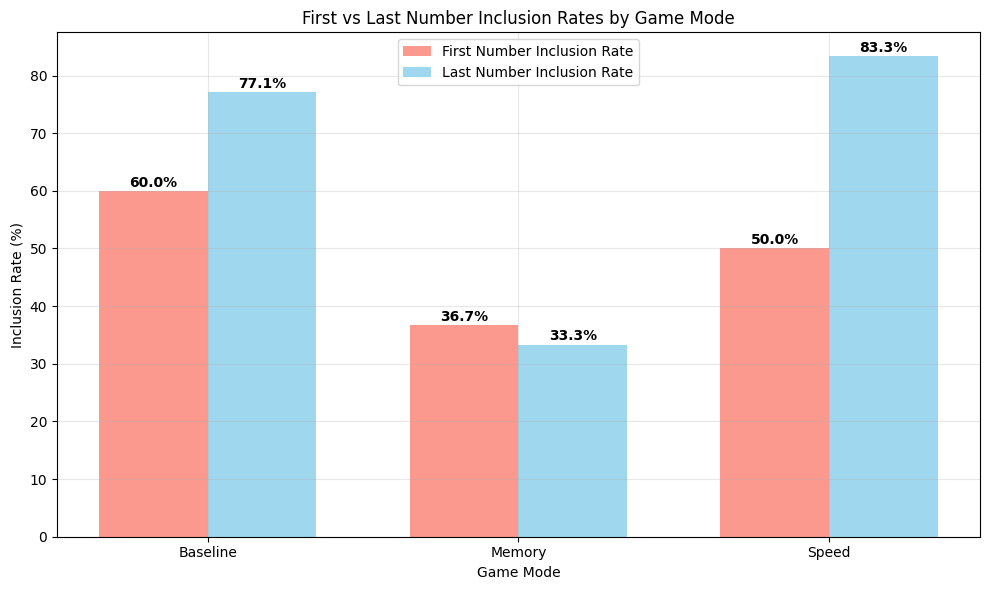

This shows the INCLUSION RATES (percentages) rather than raw counts


In [111]:
# PERCENTAGE COMPARISON CHART
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate inclusion rates as percentages
game_modes = ['Baseline', 'Memory', 'Speed']
total_attempts = [len(first_baseline), len(first_memory), len(first_speed)]
first_inclusion_rates = [(first_baseline_count/len(first_baseline))*100, 
                         (first_memory_count/len(first_memory))*100,
                         (first_speed_count/len(first_speed))*100]
last_inclusion_rates = [(last_baseline_count/len(last_baseline))*100,
                        (last_memory_count/len(last_memory))*100, 
                        (last_speed_count/len(last_speed))*100]

x = np.arange(len(game_modes))
width = 0.35

# Create percentage bars
bars1 = ax.bar(x - width/2, first_inclusion_rates, width, label='First Number Inclusion Rate', 
               color='salmon', alpha=0.8)
bars2 = ax.bar(x + width/2, last_inclusion_rates, width, label='Last Number Inclusion Rate', 
               color='skyblue', alpha=0.8)

ax.set_xlabel('Game Mode')
ax.set_ylabel('Inclusion Rate (%)')
ax.set_title('First vs Last Number Inclusion Rates by Game Mode')
ax.set_xticks(x)
ax.set_xticklabels(game_modes)
ax.legend()
ax.grid(True, alpha=0.3)

# Add percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.2,
               f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("This shows the INCLUSION RATES (percentages) rather than raw counts")

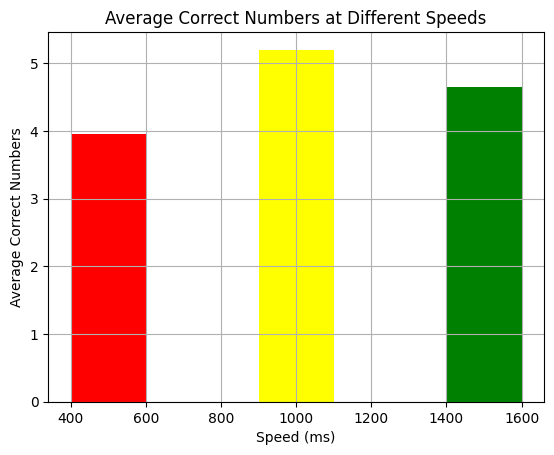

SPEED ANALYSIS - Correct Numbers Performance:
At 500ms:  3.95 average correct numbers (20 attempts)
At 1000ms: 5.20 average correct numbers (20 attempts)
At 1500ms: 4.65 average correct numbers (20 attempts)

Best performance: 1000ms
Worst performance: 500ms


In [112]:
# Graph over correct numbers achieved per speed
import matplotlib.pyplot as plt
data = pd.read_csv("TotalSpeed.csv", usecols=["speed_ms", "correct_numbers"]).dropna()

# Correct numbers achieved at each speed
correct_500ms = data[data['speed_ms'] == 500]['correct_numbers']
correct_1000ms = data[data['speed_ms'] == 1000]['correct_numbers']
correct_1500ms = data[data['speed_ms'] == 1500]['correct_numbers']

# Calculate averages for each speed
avg_500 = data[data['speed_ms'] == 500]['correct_numbers'].mean()
avg_1000 = data[data['speed_ms'] == 1000]['correct_numbers'].mean()
avg_1500 = data[data['speed_ms'] == 1500]['correct_numbers'].mean()

# Graphing the data: X axis is speed, Y axis is average correct numbers
plt.bar([500, 1000, 1500], [avg_500, avg_1000, avg_1500],
        color=['red', 'yellow', 'green'], width=200)
plt.xlabel('Speed (ms)')
plt.ylabel('Average Correct Numbers')
plt.title('Average Correct Numbers at Different Speeds')
plt.grid()
plt.show()

# Print detailed statistics for each speed
print("SPEED ANALYSIS - Correct Numbers Performance:")
print("=" * 50)
print(f"At 500ms:  {avg_500:.2f} average correct numbers ({len(correct_500ms)} attempts)")
print(f"At 1000ms: {avg_1000:.2f} average correct numbers ({len(correct_1000ms)} attempts)")
print(f"At 1500ms: {avg_1500:.2f} average correct numbers ({len(correct_1500ms)} attempts)")

print(f"\nBest performance: {1500 if avg_1500 >= max(avg_500, avg_1000) else (1000 if avg_1000 >= avg_500 else 500)}ms")
print(f"Worst performance: {500 if avg_500 <= min(avg_1000, avg_1500) else (1000 if avg_1000 <= avg_1500 else 1500)}ms")

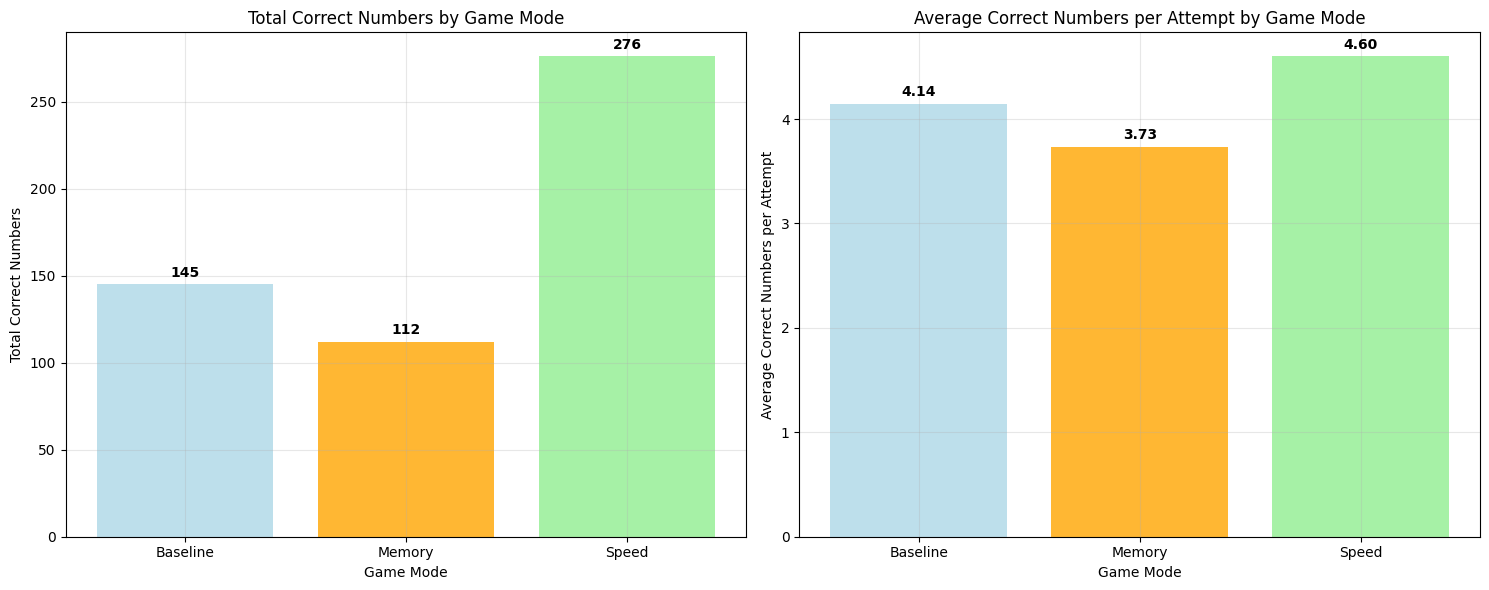

CORRECT NUMBERS PERFORMANCE COMPARISON:
BASELINE:  145 total correct, 4.14 avg per attempt (35 attempts)
MEMORY:  112 total correct, 3.73 avg per attempt (30 attempts)
SPEED:   276 total correct, 4.60 avg per attempt (60 attempts)

KEY INSIGHTS:
--------------------
Best total performance: Speed (276 correct numbers)
Worst total performance: Memory (112 correct numbers)
Highest average per attempt: Speed (4.60 correct/attempt)
Lowest average per attempt: Memory (3.73 correct/attempt)


In [113]:
# CORRECT NUMBERS COMPARISON - Analyzing performance across game modes
import matplotlib.pyplot as plt
import numpy as np

# Calculate total correct numbers for each game mode (these are the sums from the correct_numbers column)
total_correct_baseline = dataBASELINE.sum()    # Sum of all correct numbers in baseline mode
total_correct_memory = dataMEMORY.sum()   # Sum of all correct numbers in memory mode  
total_correct_speed = dataSPEED.sum()      # Sum of all correct numbers in speed mode

# Calculate average correct numbers per attempt
avg_correct_baseline = dataBASELINE.mean()
avg_correct_memory = dataMEMORY.mean() 
avg_correct_speed = dataSPEED.mean()

# Create comparison charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Total Correct Numbers Count
game_modes = ['Baseline', 'Memory', 'Speed']
total_correct = [total_correct_baseline, total_correct_memory, total_correct_speed]
colors = ['lightblue', 'orange', 'lightgreen']

bars1 = ax1.bar(game_modes, total_correct, color=colors, alpha=0.8)
ax1.set_title('Total Correct Numbers by Game Mode')
ax1.set_ylabel('Total Correct Numbers')
ax1.set_xlabel('Game Mode')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, total) in enumerate(zip(bars1, total_correct)):
    ax1.text(bar.get_x() + bar.get_width()/2., total + max(total_correct) * 0.01,
            f'{int(total)}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Average Correct Numbers per Attempt
avg_correct = [avg_correct_baseline, avg_correct_memory, avg_correct_speed]

bars2 = ax2.bar(game_modes, avg_correct, color=colors, alpha=0.8)
ax2.set_title('Average Correct Numbers per Attempt by Game Mode')
ax2.set_ylabel('Average Correct Numbers per Attempt')
ax2.set_xlabel('Game Mode') 
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, avg) in enumerate(zip(bars2, avg_correct)):
    ax2.text(bar.get_x() + bar.get_width()/2., avg + max(avg_correct) * 0.01,
            f'{avg:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed summary
print("CORRECT NUMBERS PERFORMANCE COMPARISON:")
print("=" * 50)
print(f"BASELINE:  {total_correct_baseline} total correct, {avg_correct_baseline:.2f} avg per attempt ({len(dataBASELINE)} attempts)")
print(f"MEMORY:  {total_correct_memory} total correct, {avg_correct_memory:.2f} avg per attempt ({len(dataMEMORY)} attempts)")
print(f"SPEED:   {total_correct_speed} total correct, {avg_correct_speed:.2f} avg per attempt ({len(dataSPEED)} attempts)")

# Find which mode has best/worst performance
max_total = max(total_correct)
min_total = min(total_correct)
max_mode = game_modes[total_correct.index(max_total)]
min_mode = game_modes[total_correct.index(min_total)]

max_avg = max(avg_correct)
min_avg = min(avg_correct)
max_avg_mode = game_modes[avg_correct.index(max_avg)]
min_avg_mode = game_modes[avg_correct.index(min_avg)]

print(f"\nKEY INSIGHTS:")
print("-" * 20)
print(f"Best total performance: {max_mode} ({int(max_total)} correct numbers)")
print(f"Worst total performance: {min_mode} ({int(min_total)} correct numbers)")
print(f"Highest average per attempt: {max_avg_mode} ({max_avg:.2f} correct/attempt)")
print(f"Lowest average per attempt: {min_avg_mode} ({min_avg:.2f} correct/attempt)")